<a href="https://colab.research.google.com/github/elidepb/EjerciciosMatlab/blob/main/svr_datos_yurimaguas(malaria).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importación de librerias**

In [ ]:
#importacion de librerias
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import keras
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import preprocessing as pre
from sklearn.metrics import mean_absolute_error

### **Lectura del archivo con los datos de casos y parametros climaticos**

In [ ]:
pwd = os.getcwd()
filepath = os.path.join(pwd,r"/content/drive/MyDrive/CURSOS 2024-2/SEMINARIO DE TESIS/PROGRAMACION/PRUEBAS/SVR/DATA/datos_malaria_climatologia_2004_2014.xlsx")
filepath

'/content/drive/MyDrive/CURSOS 2024-2/SEMINARIO DE TESIS/PROGRAMACION/PRUEBAS/SVR/DATA/datos_malaria_climatologia_2004_2014.xlsx'

In [ ]:
df = pd.read_excel(filepath)
df
# En las columnas de meses hemos asignado números del 1 al 12 respectivamente para los meses de enero a diciembre
#La tabla incluye parámetros de precipitación y temperatura

,ano,mes,numero_de_casos,precipitacion_acumulada,temperatura_maxima,temperatura_minima,temperatura_promedio,distrito
0,2004,1,128.0,60.7,35.0,20.2,27.60,YURIMAGUAS
1,2004,2,90.0,154.8,35.0,19.0,27.00,YURIMAGUAS
2,2004,3,66.0,236.1,35.0,19.0,27.00,YURIMAGUAS
3,2004,4,57.0,178.5,33.2,20.5,26.85,YURIMAGUAS
4,2004,5,42.0,157.2,34.0,19.2,26.60,YURIMAGUAS
...,...,...,...,...,...,...,...,...
138,2014,9,41.0,NaN,NaN,NaN,NaN,YURIMAGUAS
139,2014,10,59.0,NaN,NaN,NaN,NaN,YURIMAGUAS
140,2014,11,37.0,NaN,NaN,NaN,NaN,YURIMAGUAS
141,2014,12,19.0,NaN,NaN,NaN,NaN,YURIMAGUAS


# **GRAFICOS**

<Axes: xlabel='ano'>

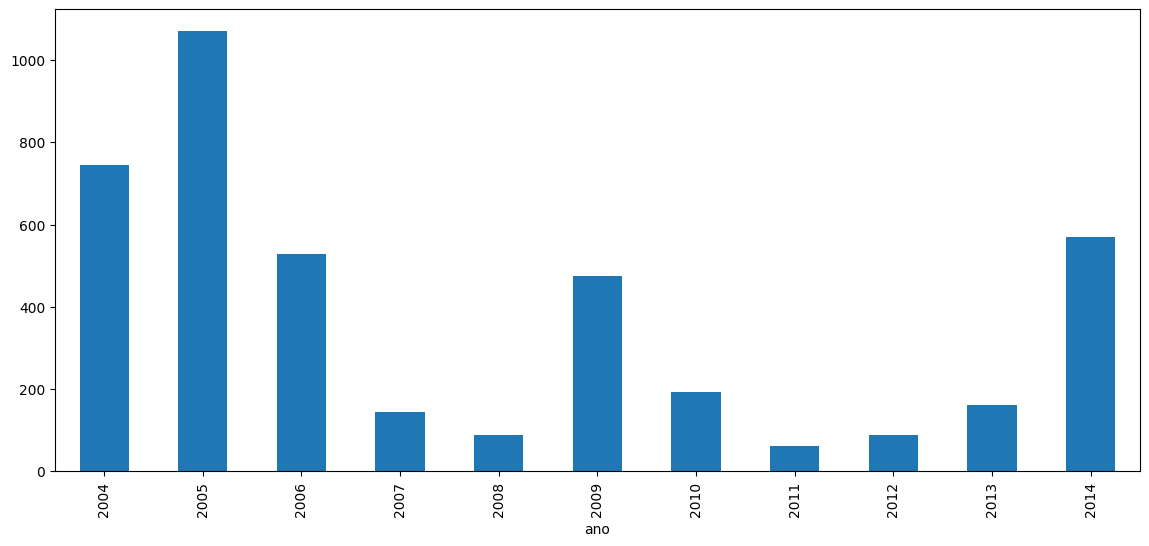

In [ ]:
plt.figure(figsize = (14,6))
df.groupby('ano')['numero_de_casos'].sum().plot.bar()

Text(0.5, 1.0, 'Casos de malaria por Año')

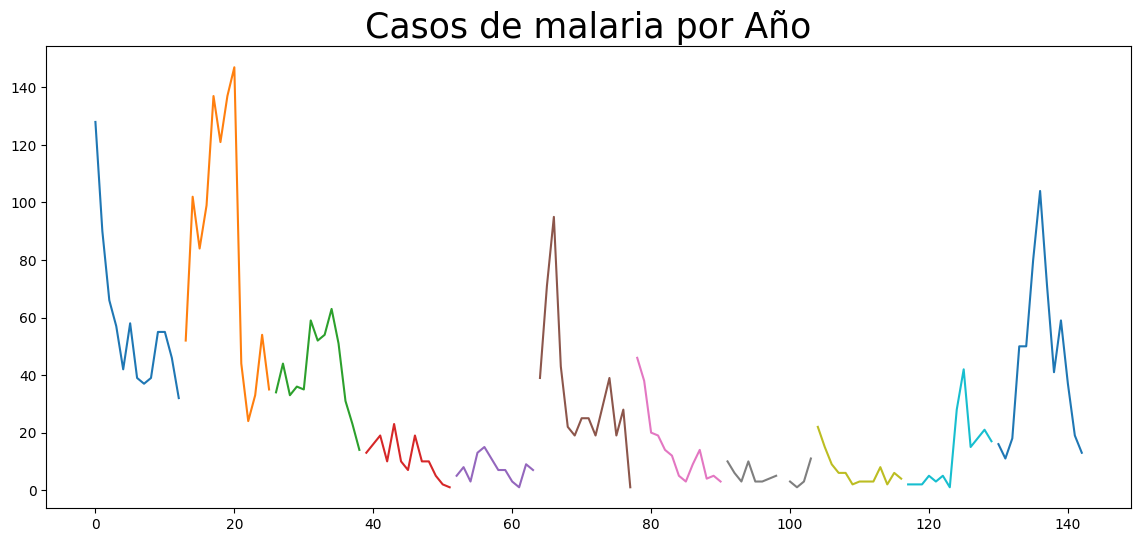

In [ ]:
plt.figure(figsize = (14,6))
df.groupby('ano')['numero_de_casos'].plot()
plt.title('Casos de malaria por Año', fontsize = 25)

Text(0.5, 1.0, 'Lluvia por año')

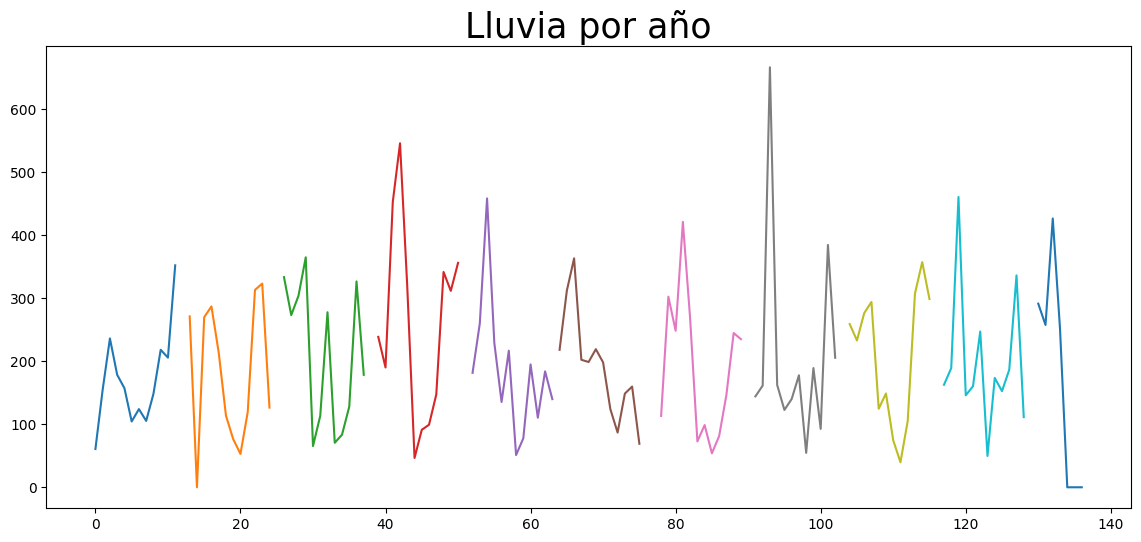

In [ ]:
plt.figure(figsize = (14,6))
df.groupby('ano')['precipitacion_acumulada'].plot()
plt.title('Lluvia por año', fontsize = 25)

# **MODELO**

In [ ]:
X = df.drop("numero_de_casos", axis=1)
X = df.drop("distrito", axis=1)
#La función de salida que estamos seleccionando aquí es el recuento de casos.
y = df["numero_de_casos"]

In [ ]:
#Tomamos los datos del tren y los probamos. Usamos el 80 por ciento de los datos para el entrenamiento y el 20 por ciento para las pruebas.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train.drop("numero_de_casos", axis=1).reset_index(drop=True)
X_test.drop("numero_de_casos", axis=1).head().reset_index(drop=True)

,ano,mes,precipitacion_acumulada,temperatura_maxima,temperatura_minima,temperatura_promedio
0,2005,4,286.9,35.0,19.0,27.00
1,2009,11,159.8,36.0,21.5,28.75
2,2009,8,124.0,35.5,NaN,35.50
3,2009,10,148.6,36.5,20.5,28.50
4,2005,2,0.0,NaN,NaN,NaN


In [ ]:
# Eliminar filas con NaN en X_train e y_train
X_train = X_train.dropna()
y_train = y_train[X_train.index]

X_test = X_test.dropna()
y_test = y_test[X_test.index]


In [ ]:
#Aquí, hemos utilizado el kernel lineal y con poco ajuste de hiperparámetros.
model = SVR(kernel='linear',C=100,gamma=.009)

#Hacer que el modelo se ajuste a las características y etiquetas.
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)

print("Test accuracy: {:.2f}".format(accuracy))


TypeError: BaseLibSVM.fit() got an unexpected keyword argument 'validation_data'

In [ ]:
y_pred = model.predict(X_test)

df1 = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

df1

,Actual,Predicted
16,99.0,98.951010
74,39.0,39.058091
73,29.0,29.072982
113,8.0,8.069323
81,19.0,19.040045
8,39.0,39.080106
118,2.0,2.052890
93,3.0,3.027198
104,22.0,22.017305
102,3.0,3.095764


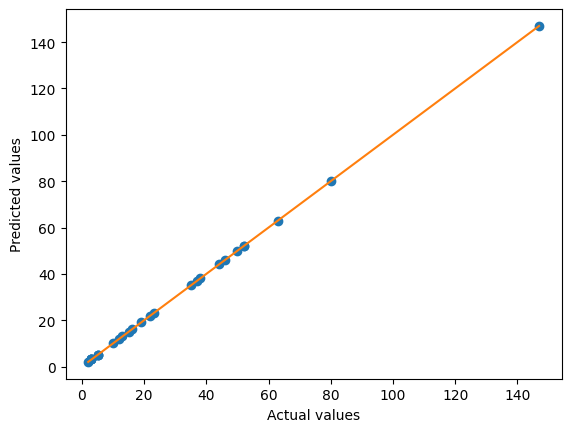

In [ ]:
# Graficar los valores reales versus los previstos
plt.plot(y_test, y_pred, "o")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

<Axes: xlabel='numero_de_casos', ylabel='precipitacion_acumulada'>

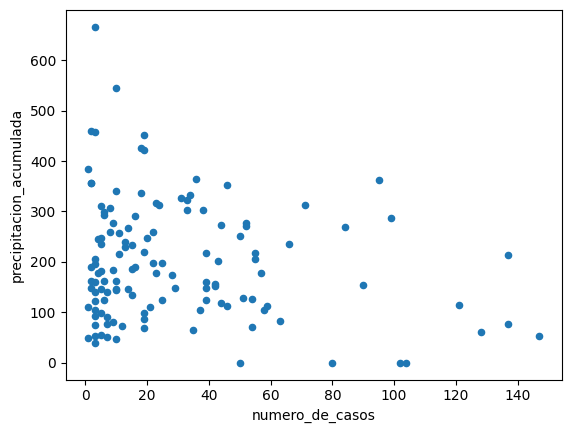

In [ ]:
df.plot(x="numero_de_casos", y="precipitacion_acumulada", kind="scatter")

In [ ]:
#MAE of the model.

mean_absolute_error(y_test, y_pred)

0.06085641090349033

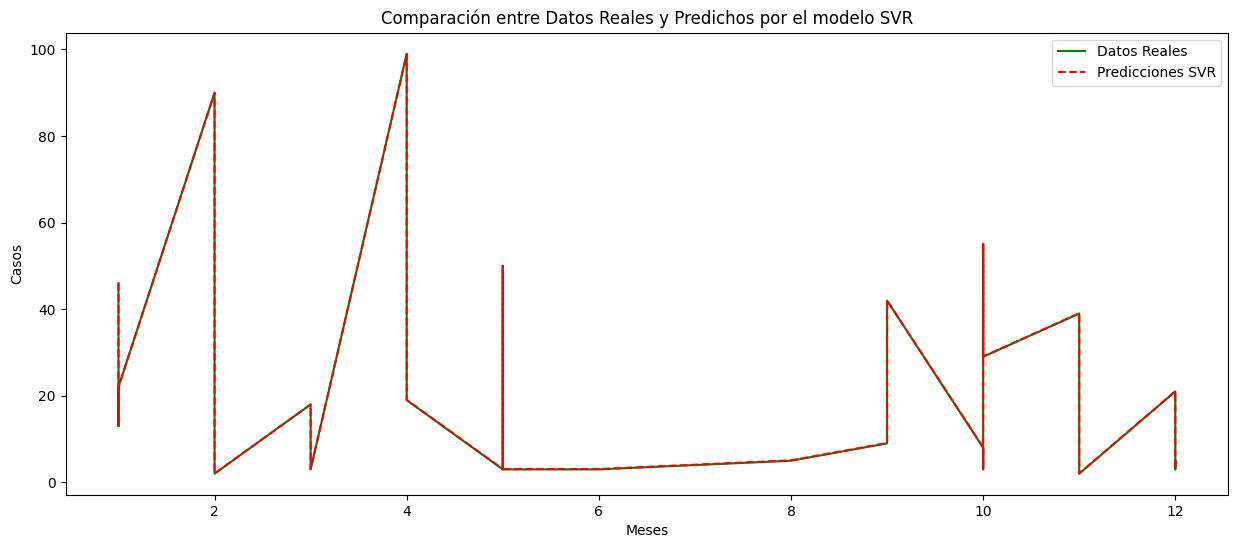

In [ ]:
# Asegúrate de importar las bibliotecas necesarias al inicio de tu notebook
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que tienes `y_test` y `y_pred` generados por tu modelo SVR
# Crea el DataFrame con los datos de prueba y predicción
# Assuming 'mes' column in X_test represents months:
df1 = pd.DataFrame({"Meses": X_test['mes'], "Actual": y_test, "Predicted": y_pred})

# If 'mes' is not the correct column name, replace it with the actual column name for months.


# Ordenar el DataFrame por el eje X (meses) si es necesario
df1 = df1.sort_values(by="Meses")

# Graficar los datos
plt.figure(figsize=(15, 6))
plt.plot(df1['Meses'], df1['Actual'], color='green', label='Datos Reales')
plt.plot(df1['Meses'], df1['Predicted'], color='red', label='Predicciones SVR', linestyle='--')

plt.xlabel('Meses')
plt.ylabel('Casos')
plt.title('Comparación entre Datos Reales y Predichos por el modelo SVR')
plt.legend()
plt.show()